# TODO
* better example of REPL 
* More matrix/ math examples
* more plot examples


# Julia 
---

## Outline
* [Language introduction](#Language-Introduction)
* [Some Basics](#Some-Basics)
    * [Strings](#Strings)
    * [Collections](#Collections)
    * [Types](#Types)
    * [Functions](#Functions)
    * [Files](#Files)
    * [Parallelization](#Parallelization)
* [External Packages](#External-Packages)
    * [Plotting](#Plotting)
    * [Dataframes](#DataFrames)
    * [Machine Learning](#Machine-Learning)
* [Language Iteroperability](#Language-Interoperability)
* [Code Introspection](#Code-Introspection)
* [Macros](#Useful-Macros)
* [Gotchas](#Gotchas)
* [References](#References)

---
## Language Introduction

### Pros
* Fast! - programs compile to native code via LLVM
* High level syntax - like python or MATLAB and caters more towards the scientific user 
* Optionally typed - Whip up code without worrying about types. You can add strict typing later
* Open source (MIT) and free! - Like python, NOT like MATLAB
* Flexible usecases - Like python, Julia can be run as a script, a REPL, or a Jupyter notebook kernel (like this)
* Builtin PackageManager - with virtual environments to boot!

### Features
* Pass by reference
* Column major
* Garbage collection
* JIT (Just In Time) compilation
* Multiple Dispatch - Think functional, not Object Oriented
* Coroutines - TODO

### Other
* IDE 
  * [Juno](https://junolab.org/) or Text Editor + LanguageClient
  * [VSCode + plugin](https://github.com/julia-vscode/julia-vscode)
  * Vim/Emaccs + [Language Client/Server](https://github.com/julia-vscode/LanguageServer.jl)

## Presentation Goals
* Whet your apetite for Julia by demonstrating some of its **unique** capabilities
* Demonstrate that Julia is no longer just a science project but is quickly becoming a mature language
* Encourage MATLAB (and python?) users to consider switching to Julia

#### This presentation is meant to **IMPRESS** more than to teach

--- 
## Some Basics

### Strings
#### Charachters
"The valid Unicode code points are U+00 through U+d7ff and U+e000 through U+10ffffa" - Julia Docs

In [2]:
# Charachters
println(typeof('x')) 
println(typeof("x")) 
println('\u2200')
println(Int('x'))
println(Char(120))

Char
String
∀
120
x


In [3]:
# tricks
println('a' < 'b')
println('x'-'a')
println('A' + 1)

true
23
B


#### Strings

In [4]:
str = "Hello World"
println(length(str))
println(str[1])
println(str[end])

11
H
d


In [5]:
# put unicode charachters in string
s = "\u2200 x \u2203 y"

"∀ x ∃ y"

In [7]:
# Interpolation
name = "Daniel"
age = 26
println("My name is $name and I'm $age years old")

# execute a statement inside a string
println("4+5=$(4+5)")

# raw string
println(raw"4+5=$(4+5)") 

My name is Daniel and I'm 26 years old
4+5=9
4+5=$(4+5)


In [12]:
# Regular Expressions
reg = r"(?<hour>\d+):(?<minute>\d+)"
println(typeof(reg))

m = match(reg, "12:45")
println(m[:minute])

Regex
45


In [15]:
# Byte Array Literals
x = b"123\u1230"
println(x)
println(x[1])
println(Char(0x31))

UInt8[0x31, 0x32, 0x33, 0xe1, 0x88, 0xb0]
49
1


### Collections

In [17]:
a = [1, 2, 3]  # 1D Array or Vector
b = [1 2 3] # 2D Array with 1 row 3 col
println("size of a = $(size(a))")
println("size of b = $(size(b))")
println(typeof(a) <: Vector)
println(typeof(b) <: Vector)

size of a = (3,)
size of b = (1, 3)
true
false


In [19]:
#  nested Arrays vs 2D Arrays vs matrix
A = [[1 2 3], [4 5 6]] # nested Arrays
B = [1 2 3 ; 4 5 6] # 2D Array => Matrix
println(typeof(A))
println(typeof(B))
println(typeof(A) <: Matrix)
println(typeof(B) <: Matrix)

Array{Array{Int64,2},1}
Array{Int64,2}
false
true


In [20]:
# creating arrays
zeros(3,4)  # also 'ones'
randn(3,1)
Array{Int64, 3}(undef, 2,2,6)

2×2×6 Array{Int64,3}:
[:, :, 1] =
 1  1
 1  0

[:, :, 2] =
 0  1
 1  0

[:, :, 3] =
 0  1
 0  0

[:, :, 4] =
 0  0
 1  1

[:, :, 5] =
 1  0
 1  1

[:, :, 6] =
 0  0
 0  0

In [62]:
# matrices definitions
m1 = [ 1 2 3; 4 5 6; 7 8 9]
m2 = [ 1 2 3
       4 5 6
       7 8 9]
m3 = reshape(1:9, (3,3))';

In [64]:
m1 == m2 == m3

true

In [5]:
a = [4,1,3,2]                    # 1D Array / Vector
b = (4, "a", 9.1, sum)           # tuple
c = Dict([("A", 1), ("B", 2)])   # dictionary/hashmap
# c = Dict("A"=>1, B=>2)

Dict{String,Int64} with 2 entries:
  "B" => 2
  "A" => 1

In [6]:
# vectorized operations begin with '.'
println(a)
println.(a)
println(a.^2)

[4, 1, 3, 2]
4
1
3
2
[16, 1, 9, 4]


In [23]:
# sets
println(3 ∈ a)
println(a ∋ 3)
println("a" ∉ b)

true
true
false


In [24]:
# one of julia's many niche but useful functions 
indexin([2,1],a)

2-element Array{Union{Nothing, Int64},1}:
 4
 2

In [26]:
# stateful iterator
import Base.Iterators.Stateful
d = Iterators.Stateful("abcdef")
println(popfirst!(d))
println(collect(Iterators.take(d,3)))
println(collect(d))

# Checkout other cool iterators in docs

a
['b', 'c', 'd']
['e', 'f']


### Types


In [28]:
# check checking with 'typof' and 'isa'
println(typeof(4))
println(typeof(4) <: Int)
println(isa(4, Float32))

Int64
true
false


In [29]:
# assert is instance of
21::AbstractFloat

TypeError: TypeError: in typeassert, expected AbstractFloat, got Int64

In [30]:
# determine if one type is a subtype of another
Int64 <: Number

true

In [31]:
# composite types
struct Thing1
    a::Int
    b::String
end
t1 = Thing1(6,"hi")
println(typeof(t1))

Thing1


In [33]:
# parametric types
struct Point{T}
    x::T
    y::T
end
p = Point(5, 7)


Point{Int64}(5, 7)

In [34]:
struct FloatPoint{T<:AbstractFloat}
    x::T
    y::T
end
println(FloatPoint(3.2,6.7))
println(FloatPoint(4,7))

FloatPoint{Float64}(3.2, 6.7)


MethodError: MethodError: no method matching FloatPoint(::Int64, ::Int64)

### Functions

In [36]:
function thing(a, b=100, c... ; d=-10)
    println("a=$a , b=$b , c=$c, d=$d")
end

thing (generic function with 2 methods)

In [38]:
thing("hey")
thing("dan", 3)
thing("dan", 2, 5.5, 6.6)
thing("dan", d=6)
thing("dan", b=5)

a=hey , b=100 , c=(), d=-10
a=dan , b=3 , c=(), d=-10
a=dan , b=2 , c=(5.5, 6.6), d=-10
a=dan , b=100 , c=(), d=6


MethodError: MethodError: no method matching thing(::String, ::Int64; b=5)
Closest candidates are:
  thing(::Any, ::Any, !Matched::Any...; d) at In[36]:2 got unsupported keyword argument "b"
  thing(::Any) at In[36]:2 got unsupported keyword argument "b"

In [34]:
# oneline function
gauss(x, μ=0, σ=1) = 1/(σ*sqrt(2*π))*exp(-0.5*((x-μ)/σ)^2)
gauss(4)

0.00013383022576488537

In [40]:
# lambda
map(x->x^2+3, [1,2,3])

3-element Array{Int64,1}:
  4
  7
 12

In [41]:
# strict typing
oneliner(x::Int64)::Float64 = (x+1)^2
oneliner(6)

49.0

In [44]:
# unicode functions
∑(x...) = sum(x)
∑(4,5,9)

18

In [23]:
# override operators like '+'
import Base.+

struct Person
    name::String
    wealth::Float64
end
# overload '+' operator for 'Person' type
+(p1::Person, p2::Person) = Person(p1.name*"&"*p2.name, p1.wealth+p2.wealth)

p1 = Person("Daniel", 5)
p2 = Person("Raeley", 1000000)
p1+p2

Person("Daniel&Raeley", 1.000005e6)

In [35]:
# parametric function
function param(a::T) where {T <: AbstractFloat}
    println(typeof(a))
end
param(4.5)
param(4)

Float64


MethodError: MethodError: no method matching param(::Int64)
Closest candidates are:
  param(!Matched::T) where T<:AbstractFloat at In[35]:3

In [48]:
# function that takes a parametric type
function points(a::Point{<:Integer}) end

points (generic function with 1 method)

### Files

In [20]:
# json file reading
using JSON
json_obj = JSON.parse(read("json_example.json", String))
println("keys = $(keys(json_obj["FSD"]))")
println.(json_obj["FSD"]["personel"]);

keys = ["id", "personel"]
Dict{String,Any}("name" => "Dwight K. Schrute","age" => 32)
Dict{String,Any}("name" => "Jim Halpert","age" => 30)
Dict{String,Any}("name" => "William M. Buttlicker","age" => 60)


In [26]:
# binary file writing
open("temp.bin", "w") do io
    write(io, 99)
    write(io, "hello world")
end;

In [30]:
# binary file reading
io = open("temp.bin", "r")
println(read(io, Int))
println(String(read(io, 11)))
close(io)

99
hello world


### Parallelization

[threads in julia-1.3](https://julialang.org/blog/2019/07/multithreading/)

In [11]:
using Base.Threads: @threads, @spawn
# check that multiple threads are enabled. if not ```export JULIA_NUM_THREADS=4```
println("num threads = $(Threads.nthreads())")

@threads for i = 1:10
    println("i = $i on thread $(Threads.threadid())")
end

num threads = 4
i = 1 on thread 1
i = 7 on thread 3
i = 2 on thread 1
i = 9 on thread 4
i = 8 on thread 3
i = 3 on thread 1
i = 10 on thread 4
i = 4 on thread 2
i = 5 on thread 2
i = 6 on thread 2


In [14]:
arr1 = randn(5000)
arr2 = randn(5000)
sort1_task = @spawn sort(arr1)
sort2 = sort(arr2)
sort1 = fetch(sort1_task)

println("first=$(sort1[1]) last=$(sort1[end])")
println("first=$(sort2[1]) last=$(sort2[end])")

first=-3.6527635913299394 last=3.341278084083789
first=-4.268262658537813 last=3.413760645896908


---
## External Packages

### Plotting
#### [Plots.jl](http://docs.juliaplots.org/latest/) +  [PlotThemes.jl](https://github.com/JuliaPlots/PlotThemes.jl)

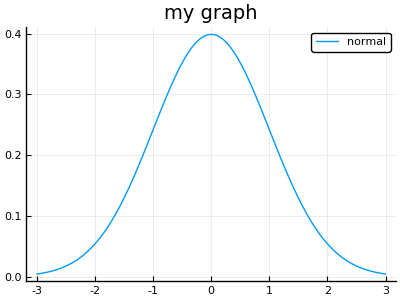

In [39]:
using Plots
pyplot()

x=range(-3,3,length=100)
p = plot(x,gauss.(x), size=(400, 300), label="normal", title="my graph")

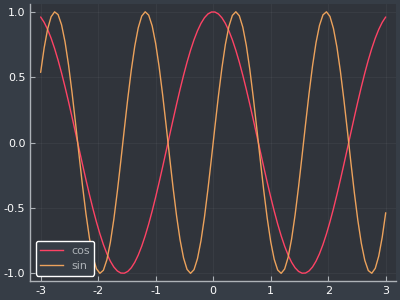

In [80]:
theme(:dark)
plot(x, hcat(cos.(2*x), sin.(4*x)), label=["cos" "sin"],size=(400,300))

### DataFrames 
#### [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl)

In [56]:
using DataFrames
df = DataFrame(A = 1:5, B = rand(5), C = ["a","b","c","b","a"])

,A,B,C
,Int64,Float64,String
1,1,0.785962,a
2,2,0.188941,b
3,3,0.107267,c
4,4,0.386551,b
5,5,0.560126,a


In [57]:
df[df[:,:C] .== "b",:]

,A,B,C
,Int64,Float64,String
1,2,0.188941,b
2,4,0.386551,b


### Machine Learning
#### [Flux.jl](https://github.com/FluxML/Flux.jl)

In [ ]:
using Flux, Flux.Data.MNIST
using Flux: @epochs, onehotbatch, mse, throttle
using Base.Iterators: partition
using CUDAapi
if has_cuda()
    @info "CUDA is on"
    import CuArrays
    CuArrays.allowscalar(false)
end

imgs = MNIST.images()

# Partition into batches of size 1000
data = [float(hcat(vec.(imgs)...)) for imgs in partition(imgs, 1000)]
data = gpu.(data)

N = 32 # Size of the encoding

# You can try to make the encoder/decoder network larger
# Also, the output of encoder is a coding of the given input.
# In this case, the input dimension is 28^2 and the output dimension of
# encoder is 32. This implies that the coding is a compressed representation.
# We can make lossy compression via this `encoder`.
encoder = Dense(28^2, N, leakyrelu) |> gpu
decoder = Dense(N, 28^2, leakyrelu) |> gpu

m = Chain(encoder, decoder)

loss(x) = mse(m(x), x)

evalcb = throttle(() -> @show(loss(data[1])), 5)
opt = ADAM()

@epochs 10 Flux.train!(loss, params(m), zip(data), opt, cb = evalcb)

## Language Interoperability

In [65]:
# call python
using PyCall

so = pyimport("scipy.optimize")
so.newton(x -> cos(x) - x, 1)

0.7390851332151607

In [69]:
# call C libraries
using Libdl
hostname = Vector{UInt8}(undef, 256) # MAXHOSTNAMELEN
err = ccall(:gethostname, Int32,
            (Ptr{UInt8}, Csize_t),
            hostname, sizeof(hostname))
Base.systemerror("gethostname", err != 0)
hostname[end] = 0 # ensure null-termination
unsafe_string(pointer(hostname))

"dms-lin-p5820"

## Code Introspection

In [2]:
@code_llvm 2+5


;  @ int.jl:53 within `+'
define i64 @"julia_+_14741"(i64, i64) {
top:
  %2 = add i64 %1, %0
  ret i64 %2
}


In [3]:
@code_native 2+5

	.text
; ┌ @ int.jl:53 within `+'
	leaq	(%rdi,%rsi), %rax
	retq
	nopw	%cs:(%rax,%rax)
; └


In [44]:
@code_llvm sum(4,5)


;  @ reduce.jl:395 within `sum'
; Function Attrs: noreturn
define void @julia_sum_17410(i64, i64) #0 {
top:
  %2 = alloca %jl_value_t addrspace(10)*, i32 3
  %gcframe = alloca %jl_value_t addrspace(10)*, i32 4
  %3 = bitcast %jl_value_t addrspace(10)** %gcframe to i8*
  call void @llvm.memset.p0i8.i32(i8* %3, i8 0, i32 32, i32 0, i1 false)
  %thread_ptr = call i8* asm "movq %fs:0, $0", "=r"()
  %ptls_i8 = getelementptr i8, i8* %thread_ptr, i64 -15712
  %ptls = bitcast i8* %ptls_i8 to %jl_value_t***
  %4 = getelementptr %jl_value_t addrspace(10)*, %jl_value_t addrspace(10)** %gcframe, i32 0
  %5 = bitcast %jl_value_t addrspace(10)** %4 to i64*
  store i64 4, i64* %5
  %6 = getelementptr %jl_value_t**, %jl_value_t*** %ptls, i32 0
  %7 = getelementptr %jl_value_t addrspace(10)*, %jl_value_t addrspace(10)** %gcframe, i32 1
  %8 = bitcast %jl_value_t addrspace(10)** %7 to %jl_value_t***
  %9 = load %jl_value_t**, %jl_value_t*** %6
  store %jl_value_t** %9, %jl_value_t*** %8
  %10 = bitcast

## REPL

The REPL is awesome: 
![](repl.png)

Do live examples of
* clear Ctrl+l
* search Ctrl+r
* help
* package manager
* shell


In [64]:
# documentation
"""
    bar(x[, y])

Compute the Bar index between `x` and `y`. If `y` is missing, compute
the Bar index between all pairs of columns of `x`.

# Examples
```julia-repl
julia> bar([1, 2], [1, 2])
1
```
"""
function bar(x, y)
    println("$x,$y")
end

bar

In [65]:
?bar

search: bar barh bar! barh! barhist barhist! baremodule SubArray GlobalRef



```
bar(x[, y])
```

Compute the Bar index between `x` and `y`. If `y` is missing, compute the Bar index between all pairs of columns of `x`.

# Examples

```julia-repl
julia> bar([1, 2], [1, 2])
1
```


## Useful Macros

In [59]:
# time functions 
@time circshift(collect(1:100), 4)

  0.075847 seconds (134.85 k allocations: 6.551 MiB)


100-element Array{Int64,1}:
  97
  98
  99
 100
   1
   2
   3
   4
   5
   6
   7
   8
   9
   ⋮
  85
  86
  87
  88
  89
  90
  91
  92
  93
  94
  95
  96

In [60]:
# apply dot operator to every operation in function
fdot(x) = @. 3x^2 + 4x + 7x^3 # equivalent to 3 .* x.^2 .+ 4 .* x .+ 7 .* x.^3;

In [63]:
# logging
@info "A log message $(9+4)"

┌ Info: A log message 13
└ @ Main In[63]:2


Doc strings are interepreted as Markdown. see example below copied from [documentation](https://docs.julialang.org/en/v1.4/manual/documentation/#)

## Gotchas

[Noteworthy differences from Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1)

[Noteworthy differences from Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python-1)


## Resources
* [Julia Lang Docs](https://docs.julialang.org/en/v1/)
* [A Deep Introduction to Julia for Data Science and Scientific Computing](https://ucidatascienceinitiative.github.io/IntroToJulia/)
